In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
chunks = gpd.read_parquet('../../urbangrammar_samba/spatial_signatures/local_auth_chunks.pq')

In [3]:
from shapely.geometry import Point

gla = gpd.GeoSeries([Point(-4.25633,55.85605)], crs=4326).to_crs(27700)

In [4]:
chunks[chunks.intersects(gla[0])]

,geometry,chunkID
lbls,,
68.0,"POLYGON ((258955.030 656912.605, 258946.637 65...",68


In [5]:
data = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/morphometrics/convolutions/conv_68.pq")

In [6]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

In [7]:
scaled_data = scaler.fit_transform(data.drop(columns='hindex').fillna(0))

In [8]:
from clustergram import Clustergram

In [9]:
cg = Clustergram(range(1, 20), backend='cuML', n_init=10)
cg.fit(scaled_data)

PCA computed in 1.8118793964385986 seconds.
K=1 fitted in 2.6140174865722656 seconds.
K=2 fitted in 3.840221881866455 seconds.
K=3 fitted in 5.130520582199097 seconds.
K=4 fitted in 5.689948797225952 seconds.
K=5 fitted in 5.8220813274383545 seconds.
K=6 fitted in 9.179589033126831 seconds.
K=7 fitted in 7.834455966949463 seconds.
K=8 fitted in 12.464859247207642 seconds.
K=9 fitted in 15.907640933990479 seconds.
K=10 fitted in 13.568340301513672 seconds.
K=11 fitted in 19.260111331939697 seconds.
K=12 fitted in 15.85264539718628 seconds.
K=13 fitted in 20.813782691955566 seconds.
K=14 fitted in 22.471310138702393 seconds.
K=15 fitted in 24.740341186523438 seconds.
K=16 fitted in 18.414419412612915 seconds.
K=17 fitted in 24.593284130096436 seconds.
K=18 fitted in 30.00491166114807 seconds.
K=19 fitted in 20.45266103744507 seconds.


<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

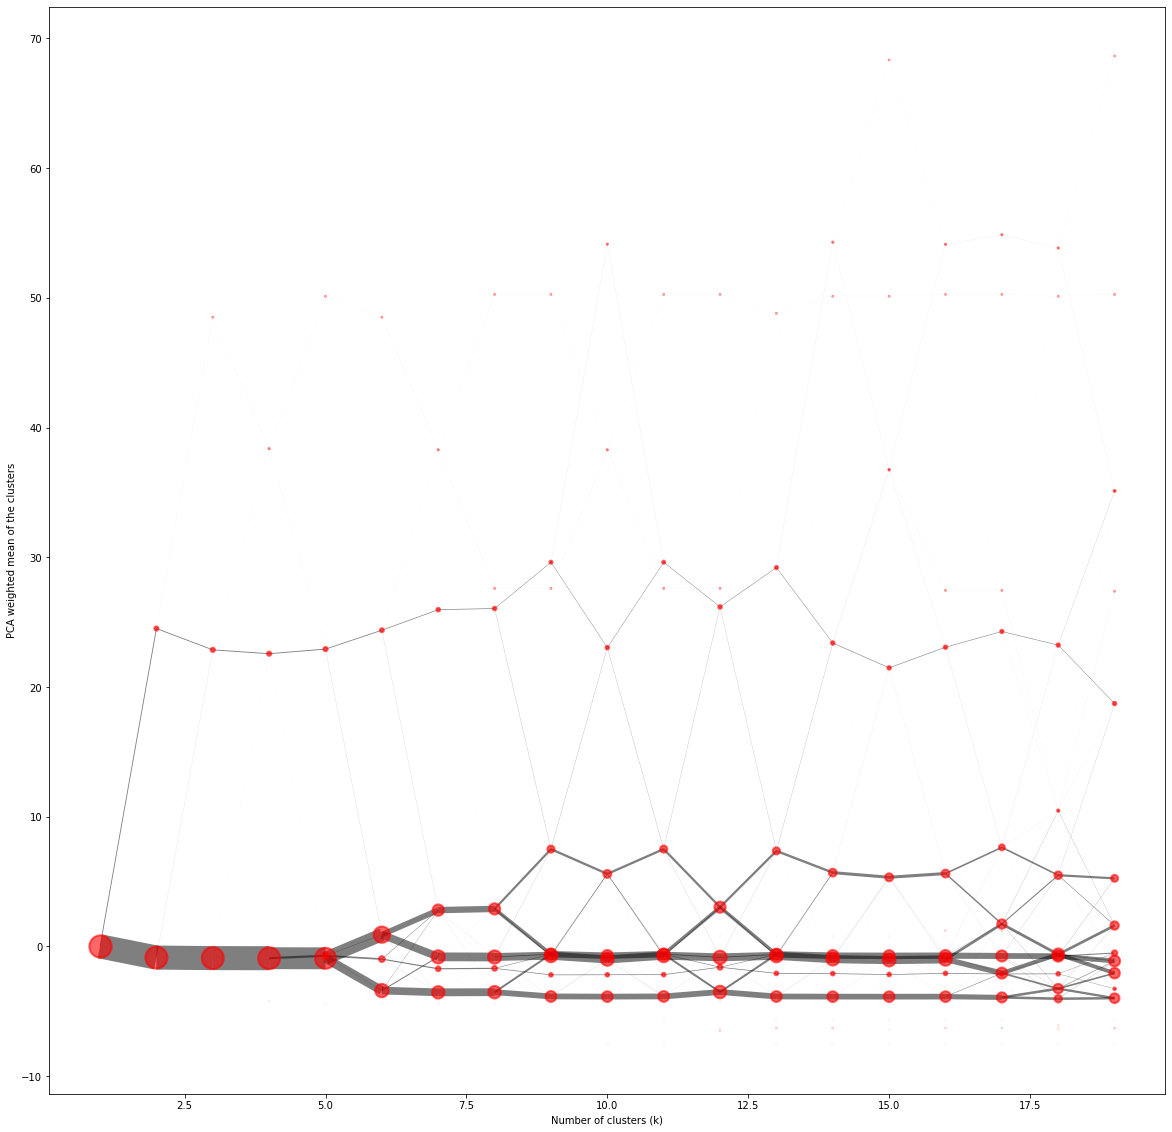

In [12]:
cg.plot(figsize=(20, 20), linewidth=0.5, cluster_style={"edgecolor": "r", "alpha":.6}, size=1,
       line_style={"alpha":.5})

In [13]:
from cuml import KMeans

km = KMeans(n_clusters=8, n_init=10).fit(scaled_data)

In [14]:
blg = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/tessellation/tess_68.pq")
blg['clusters'] = km.labels_
blg = blg.set_geometry('buildings')

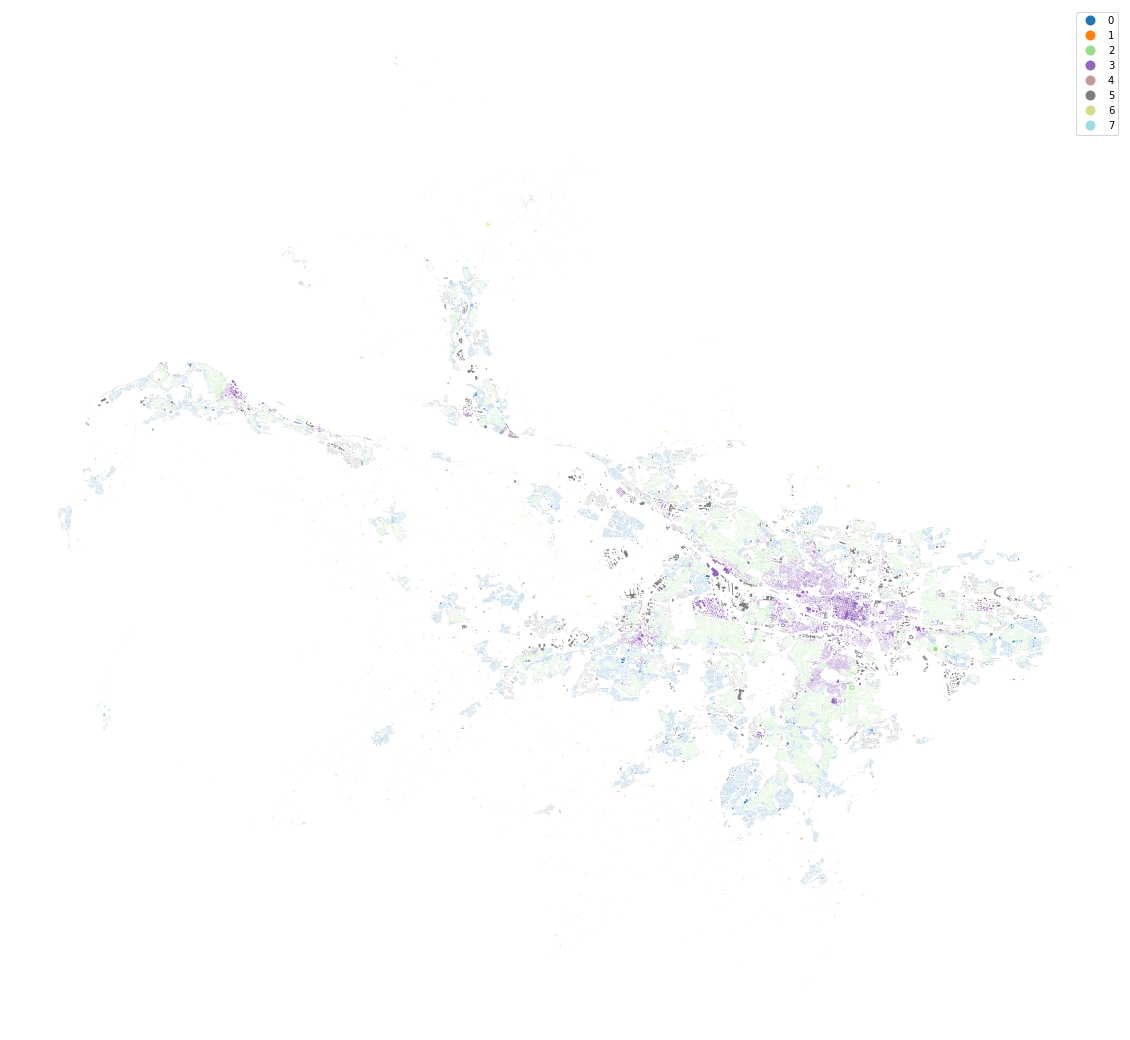

In [16]:
ax = blg.plot('clusters', categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

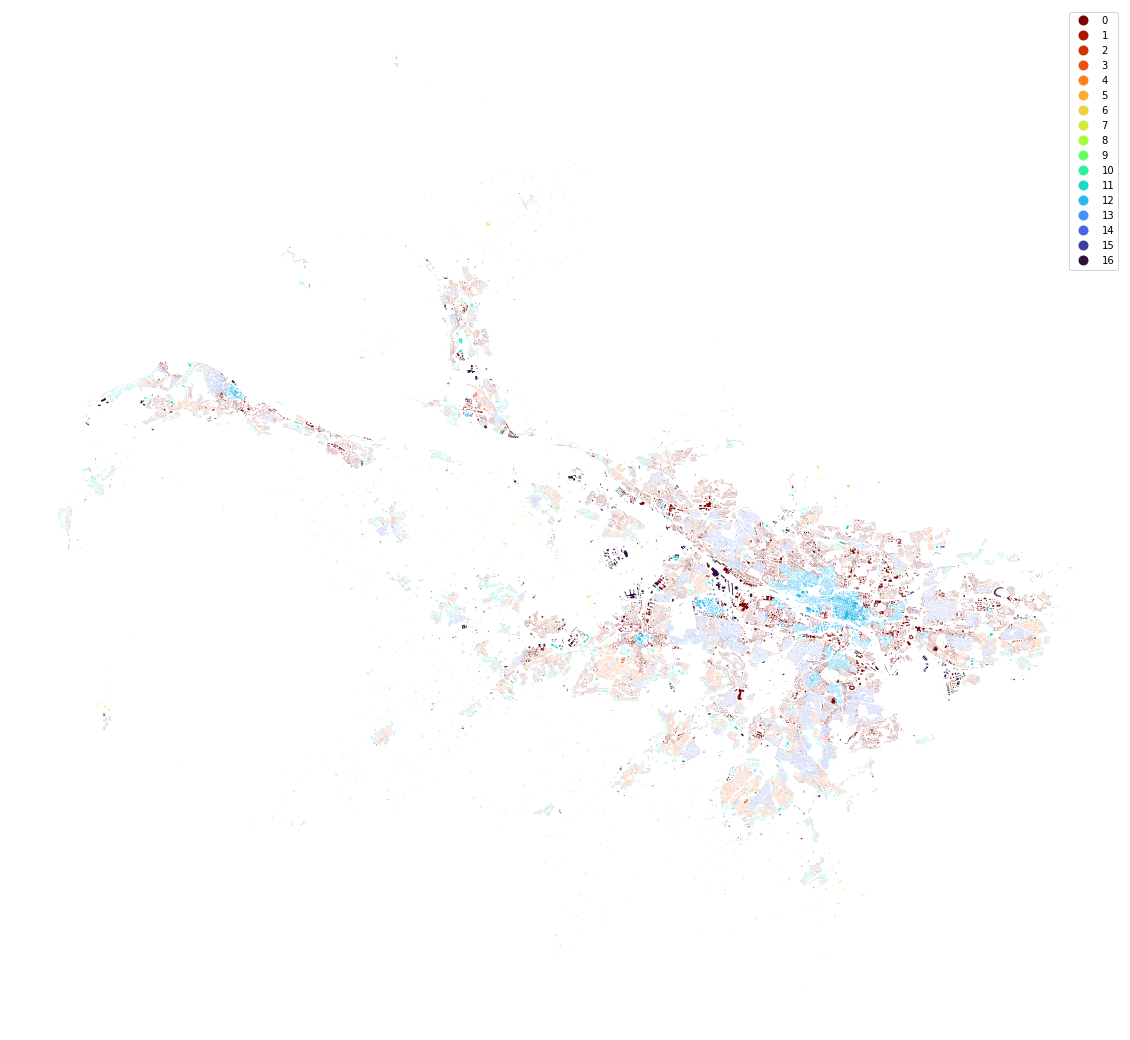

In [23]:
km = KMeans(n_clusters=17, n_init=10).fit(scaled_data)
ax = blg.plot(km.labels_, categorical=True, legend=True, figsize=(20, 20), cmap='turbo_r')
ax.set_axis_off()

In [24]:
edi = gpd.GeoSeries([Point(-3.20889,55.94513)], crs=4326).to_crs(27700)
chunks[chunks.intersects(edi[0])]

,geometry,chunkID
lbls,,
81.0,"MULTIPOLYGON (((347072.714 658735.718, 347070....",81


In [25]:
data = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/morphometrics/convolutions/conv_81.pq")
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns='hindex').fillna(0))

In [26]:
cg = Clustergram(range(1, 20), backend='cuML', n_init=10)
cg.fit(scaled_data)

PCA computed in 0.13742828369140625 seconds.
K=1 fitted in 1.7725574970245361 seconds.
K=2 fitted in 3.0521204471588135 seconds.
K=3 fitted in 3.949427843093872 seconds.
K=4 fitted in 5.335289239883423 seconds.
K=5 fitted in 4.076547384262085 seconds.
K=6 fitted in 4.301805019378662 seconds.
K=7 fitted in 5.454430818557739 seconds.
K=8 fitted in 7.275106430053711 seconds.
K=9 fitted in 8.73854112625122 seconds.
K=10 fitted in 7.599378824234009 seconds.
K=11 fitted in 9.991353511810303 seconds.
K=12 fitted in 8.904255390167236 seconds.
K=13 fitted in 8.294894456863403 seconds.
K=14 fitted in 10.175398588180542 seconds.
K=15 fitted in 10.113253355026245 seconds.
K=16 fitted in 13.158761024475098 seconds.
K=17 fitted in 14.406205654144287 seconds.
K=18 fitted in 15.91187834739685 seconds.
K=19 fitted in 15.001056432723999 seconds.


<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

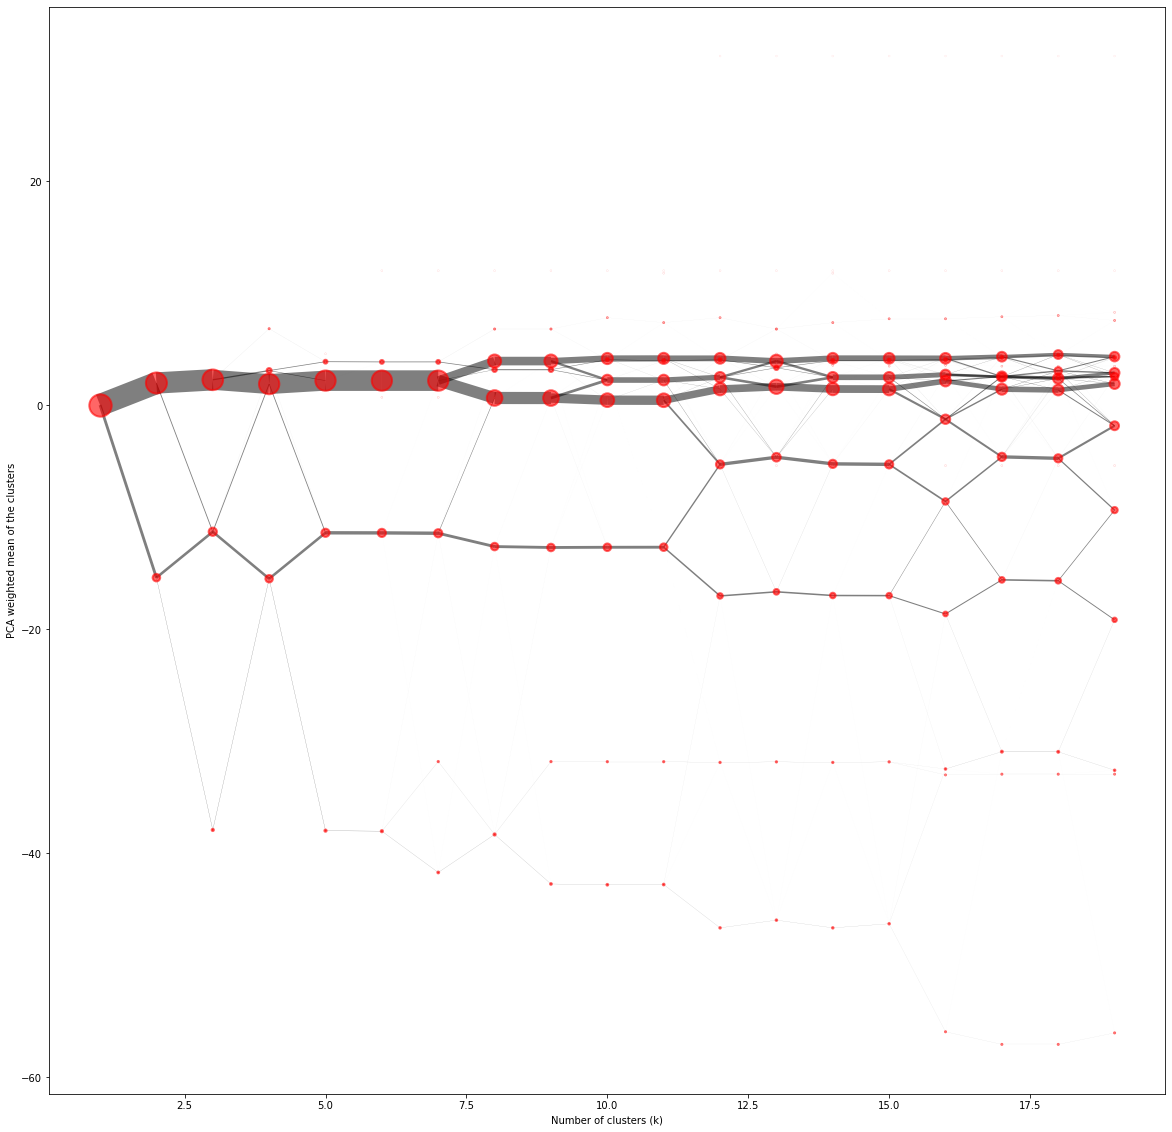

In [27]:
cg.plot(figsize=(20, 20), linewidth=0.5, cluster_style={"edgecolor": "r", "alpha":.6}, size=1,
       line_style={"alpha":.5})

In [28]:
blg = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/tessellation/tess_81.pq")
blg = blg.set_geometry('buildings')

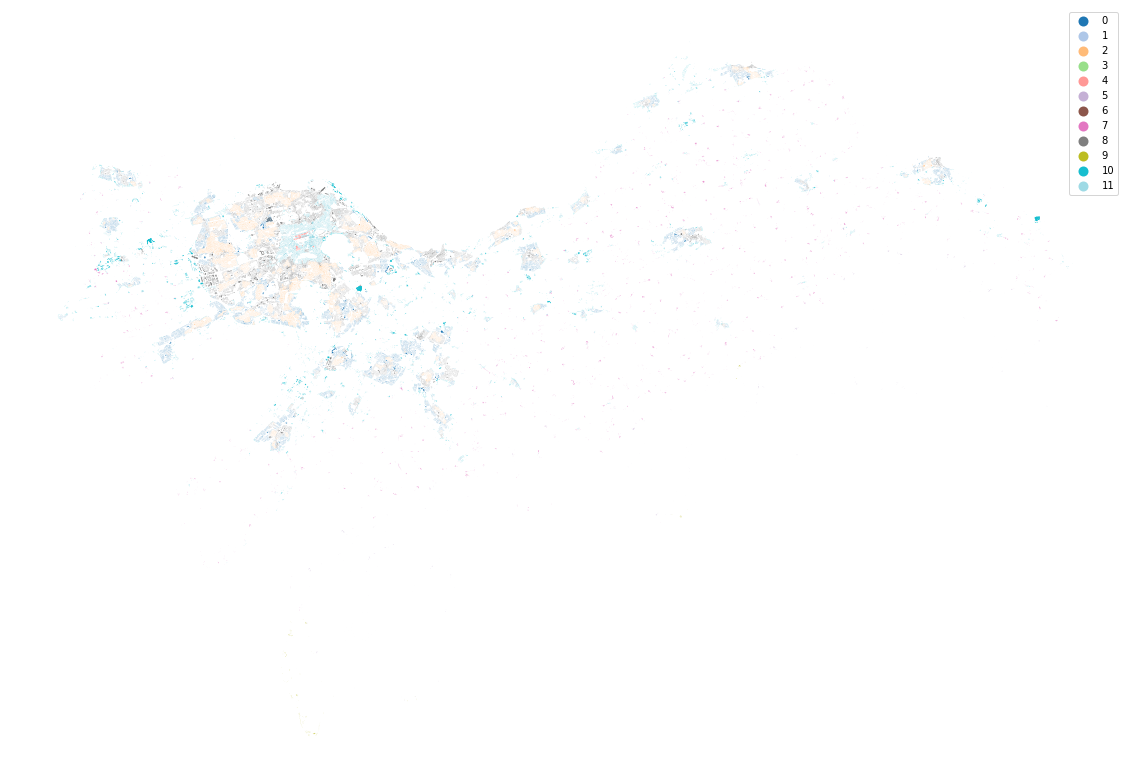

In [29]:
km = KMeans(n_clusters=12, n_init=10).fit(scaled_data)
ax = blg.plot(km.labels_, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

In [30]:
blg = blg.set_geometry('tessellation')

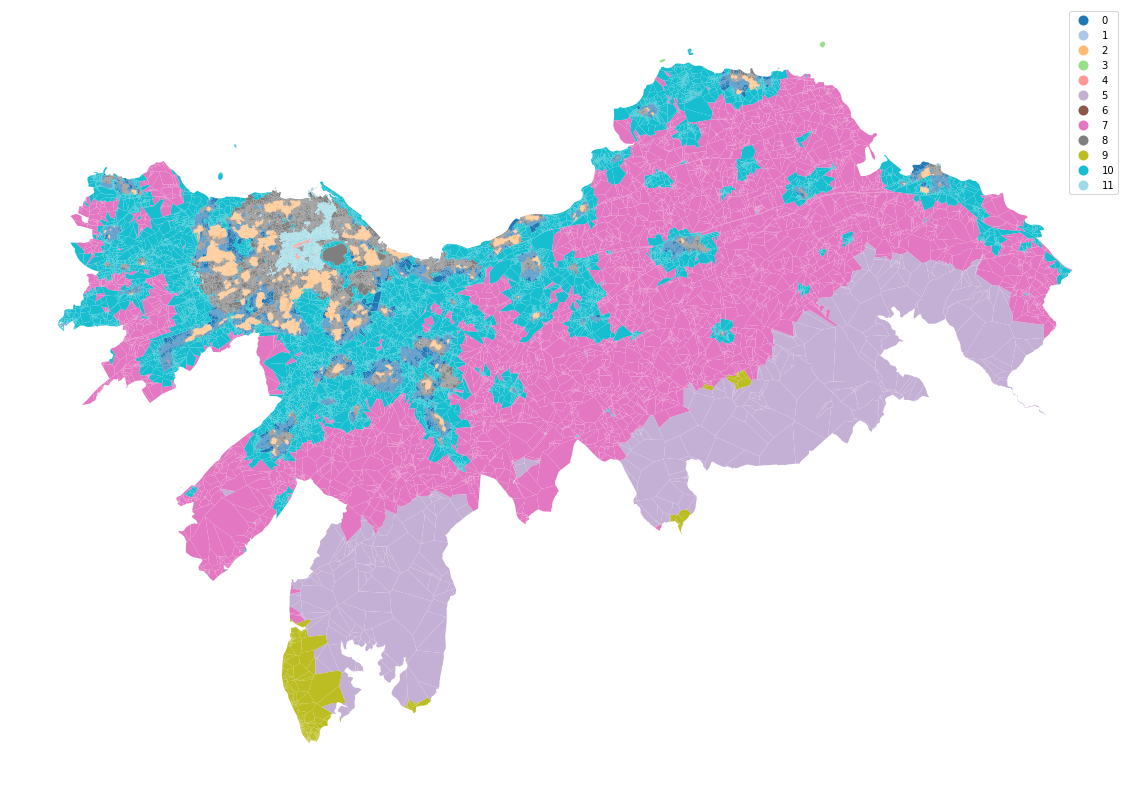

In [31]:
ax = blg.plot(km.labels_, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

In [1]:
!pip install topojson

     |████████████████████████████████| 78 kB 6.8 MB/s eta 0:00:011


In [3]:
import geopandas as gpd
df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [4]:
import topojson as tp

CPU times: user 170 ms, sys: 3.05 ms, total: 173 ms
Wall time: 171 ms
CPU times: user 444 ms, sys: 587 ms, total: 1.03 s
Wall time: 366 ms


<AxesSubplot:>

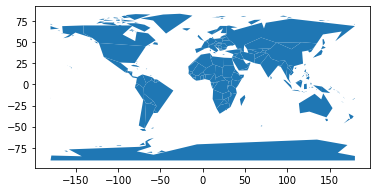

In [5]:
%time topo = tp.Topology(df, prequantize=False)
%time topo.toposimplify(5).to_gdf().plot()

In [6]:
df = gpd.read_file(gpd.datasets.get_path('nybb'))

In [ ]:
%time topo = tp.Topology(df, prequantize=False)
%time topo.toposimplify(5000).to_gdf().plot()

CPU times: user 437 ms, sys: 7.95 ms, total: 445 ms
Wall time: 443 ms
CPU times: user 426 ms, sys: 60.6 ms, total: 486 ms
Wall time: 416 ms


<AxesSubplot:>